In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [65]:
# Load the dataset
columns = ['Gender', 'Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight', 'Viscera_weight', 'Shell_weight', 'Rings']
data = pd.read_csv('abalone.csv', names=columns)

# Drop the gender feature
data = data.drop(columns=['Gender'])

# Convert the dataframe into a NumPy array for easier processing
X = data.iloc[:, :-1].values  # Features (all columns except the last)
y = data.iloc[:, -1].values    # Target variable (the last column)

In [66]:
# Split the dataset into training and testing sets
np.random.seed(42)  # For reproducibility
indices = np.random.permutation(len(X))
train_size = int(len(X) * 0.8)
train_indices, test_indices = indices[:train_size], indices[train_size:]

X_train, X_test = X[train_indices], X[test_indices]
y_train, y_test = y[train_indices], y[test_indices]

In [67]:
# Function to calculate Mean Squared Error
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Linear Regression Implementation
def linear_regression(X, y):
    X_b = np.c_[np.ones((X.shape[0], 1)), X]  # Add bias term
    theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
    return theta_best

In [81]:
# Predict using Linear Regression
theta_linear = linear_regression(X_train, y_train)
X_test_b = np.c_[np.ones((X_test.shape[0], 1)), X_test]  # Add bias term for test
y_pred_train_linear = X_train.dot(theta_linear[1:]) + theta_linear[0]
y_pred_test_linear = X_test_b.dot(theta_linear)

# Calculate MSE for Linear Regression
mse_train_linear = mean_squared_error(y_train, y_pred_train_linear)
mse_test_linear = mean_squared_error(y_test, y_pred_test_linear)

print(f'linear Regression:')
print(f'Train MSE: {mse_train_linear:.4f}, Test MSE: {mse_test_linear:.4f}')

linear Regression:
Train MSE: 5.1059, Test MSE: 4.1286


In [69]:
# Polynomial Regression Implementation
def polynomial_features(X, degree):
    return np.column_stack([X ** d for d in range(1, degree + 1)])

def polynomial_regression(X, y, degree):
    X_poly = polynomial_features(X, degree)
    X_poly_b = np.c_[np.ones((X_poly.shape[0], 1)), X_poly]  # Add bias term
    theta_best = np.linalg.inv(X_poly_b.T.dot(X_poly_b)).dot(X_poly_b.T).dot(y)
    return theta_best

In [70]:
# Store MSE results for polynomial regressions
mse_train_poly_list = []
mse_test_poly_list = []

# Predict using Polynomial Regression
for degree in [2, 3]:
    theta_poly = polynomial_regression(X_train, y_train, degree)
    X_poly_test = polynomial_features(X_test, degree)
    X_poly_train = polynomial_features(X_train, degree)
    
    y_pred_train_poly = X_poly_train.dot(theta_poly[1:]) + theta_poly[0]
    y_pred_test_poly = np.c_[np.ones((X_poly_test.shape[0], 1)), X_poly_test].dot(theta_poly)
    
    mse_train_poly = mean_squared_error(y_train, y_pred_train_poly)
    mse_test_poly = mean_squared_error(y_test, y_pred_test_poly)
    
    mse_train_poly_list.append(mse_train_poly)
    mse_test_poly_list.append(mse_test_poly)
    
    print(f'Polynomial Regression (degree={degree}):')
    print(f'Train MSE: {mse_train_poly:.4f}, Test MSE: {mse_test_poly:.4f}')

Polynomial Regression (degree=2):
Train MSE: 4.7083, Test MSE: 3.7380
Polynomial Regression (degree=3):
Train MSE: 4.6784, Test MSE: 3.7068


In [71]:
# RBF Kernel Regression Implementation with gamma tuning
def rbf_kernel(x1, x2, gamma):
    sq_dists = np.sum(x1**2, axis=1).reshape(-1, 1) + np.sum(x2**2, axis=1) - 2 * np.dot(x1, x2.T)
    return np.exp(-gamma * sq_dists)

def rbf_regression(X_train, y_train, X_test, gamma):
    K_train = rbf_kernel(X_train, X_train, gamma)
    K_test = rbf_kernel(X_test, X_train, gamma)
    alpha = np.linalg.inv(K_train + 1e-8 * np.eye(K_train.shape[0])).dot(y_train)  # Add small value to diagonal for stability
    y_pred_train = K_train.dot(alpha)
    y_pred_test = K_test.dot(alpha)
    return y_pred_train, y_pred_test

In [72]:
# Test different values of gamma to find the best
gamma_values = [0.0001, 0.001, 0.01, 0.1, 0.5]
best_gamma = None
best_mse_test_rbf = float('inf')
for gamma in gamma_values:
    y_pred_train_rbf, y_pred_test_rbf = rbf_regression(X_train, y_train, X_test, gamma)
    mse_test_rbf = mean_squared_error(y_test, y_pred_test_rbf)
    
    print(f'RBF Kernel Regression with gamma={gamma}: Test MSE = {mse_test_rbf:.4f}')
    
    if mse_test_rbf < best_mse_test_rbf:
        best_mse_test_rbf = mse_test_rbf
        best_gamma = gamma
        best_y_pred_train_rbf, best_y_pred_test_rbf = y_pred_train_rbf, y_pred_test_rbf

RBF Kernel Regression with gamma=0.0001: Test MSE = 3.7582
RBF Kernel Regression with gamma=0.001: Test MSE = 3.7324
RBF Kernel Regression with gamma=0.01: Test MSE = 3.6240
RBF Kernel Regression with gamma=0.1: Test MSE = 4.3403
RBF Kernel Regression with gamma=0.5: Test MSE = 13.7369


In [73]:
# Calculate MSE for RBF Kernel Regression with best gamma
mse_train_rbf = mean_squared_error(y_train, best_y_pred_train_rbf)
mse_test_rbf = mean_squared_error(y_test, best_y_pred_test_rbf)

print(f'Best RBF Kernel Regression with gamma={best_gamma}:')
print(f'Train MSE: {mse_train_rbf:.4f}, Test MSE: {mse_test_rbf:.4f}')

# Store all MSE results for comparison
train_mse = [mse_train_linear] + mse_train_poly_list + [mse_train_rbf]
test_mse = [mse_test_linear] + mse_test_poly_list + [mse_test_rbf]
models = ['Linear', 'Polynomial (d=2)', 'Polynomial (d=3)', 'RBF']

Best RBF Kernel Regression with gamma=0.01:
Train MSE: 4.3908, Test MSE: 3.6240


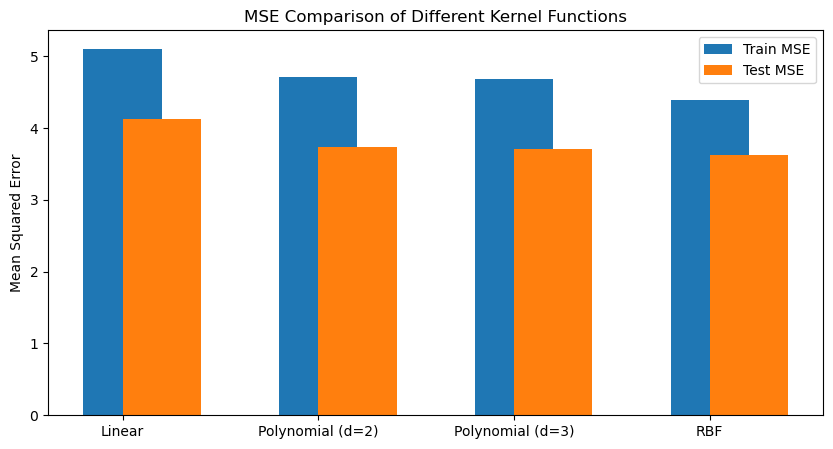

In [74]:
# Plotting MSE comparison
plt.figure(figsize=(10, 5))
plt.bar(models, train_mse, width=0.4, label="Train MSE", align='center')
plt.bar(models, test_mse, width=0.4, label="Test MSE", align='edge')
plt.ylabel("Mean Squared Error")
plt.title("MSE Comparison of Different Kernel Functions")
plt.legend()
plt.show()

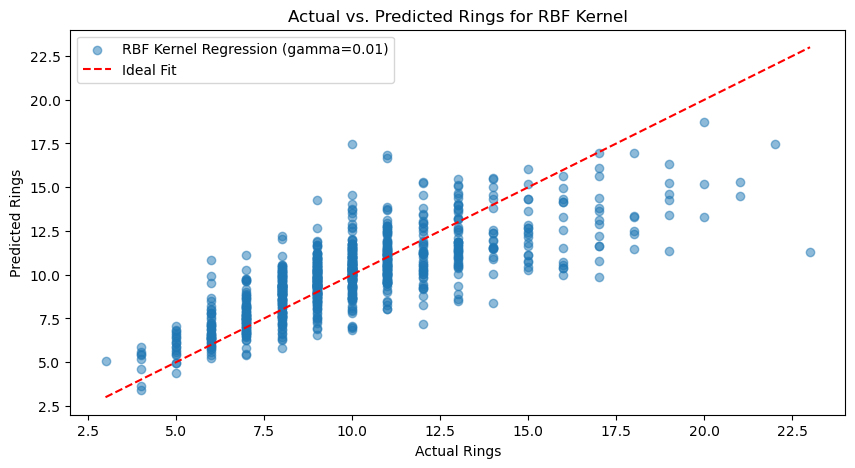

In [80]:
# Plotting predicted vs. actual values for the best performing RBF model
plt.figure(figsize=(10, 5))
plt.scatter(y_test, best_y_pred_test_rbf, alpha=0.5, label=f"RBF Kernel Regression (gamma={best_gamma})")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--", label="Ideal Fit")
plt.xlabel("Actual Rings")
plt.ylabel("Predicted Rings")
plt.title("Actual vs. Predicted Rings for RBF Kernel")
plt.legend()
plt.show()